# Progetto ML/SII 2023/2024

## Analisi ed elaborazione dati

In [427]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
from sklearn.cluster import HDBSCAN
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.cluster import cluster_optics_dbscan
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from surprise import KNNBasic, SVD, SVDpp, CoClustering, BaselineOnly, Reader, Dataset



In [119]:
#datax = Dataset.load_builtin('ml-100k')

In [120]:
#datax = pd.DataFrame(datax)

In [121]:
#lettura dati e pulizia dati con numero di votazioni troppo basse

dataset_prova = pd.read_csv(os.path.join('.', "csv_prova.csv"))
dataset_prova = dataset_prova.set_index('User')

dataset_google_reviews = pd.read_csv(os.path.join('.', "google_review_ratings.csv"))
dataset_google_reviews = dataset_google_reviews.set_index('User')


dataset_google_reviews.replace(0, np.nan, inplace=True)
data_set_shape = dataset_google_reviews.shape
dataset_google_reviews.dropna(thresh = data_set_shape[1]/2, axis=0, inplace=True)
dataset_google_reviews.dropna(thresh = 500, axis=1, inplace=True)
dataset_google_reviews.replace(np.nan, 0, inplace=True)

In [122]:
dataset_reshaped = pd.DataFrame(columns = ['User Id','Category Id','rating'])

<Axes: >

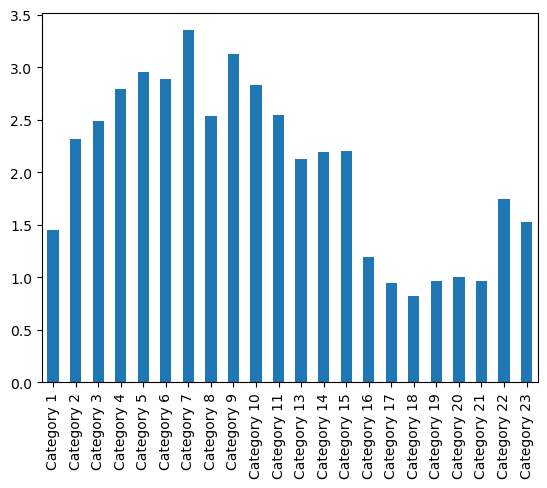

In [123]:
# vediamo la media delle votazioni per ogni categoria per capire quale tipo di scaler utilizzare

dataset_google_reviews.mean().plot(kind='bar')

In [124]:
# possiamo vedere che la media dei voti per ogni categoria è molto diversa, pertanto utilizzeremo un minmax scaler
# per tener conto di queste differenze nel range delle votazioni per categoria

# assumendo che la media per categoria 0.0 per ogni user equivale che un user non abbia votato nulla in quella categoria, eliminiamo
# le categorie e gli user con un numero di votazioni troppo basso
# in piu eliminiamo righe e colonne con un numero di votazioni/votazioni uguali a zero superiori alla metà

In [125]:
minMaxScaler = MinMaxScaler()
dataset_google_reviews = pd.DataFrame(minMaxScaler.fit_transform(dataset_google_reviews), columns=dataset_google_reviews.columns, index=dataset_google_reviews.index)

In [126]:
dataset_google_reviews

Category 1  Category 2  Category 3  Category 4  Category 5  \
User                                                                    
User 1          0.000       0.000       0.726    0.676259    1.000000   
User 2          0.000       0.000       0.726    0.676259    1.000000   
User 3          0.000       0.000       0.726    0.671463    1.000000   
User 4          0.000       0.100       0.726    0.671463    1.000000   
User 5          0.000       0.000       0.726    0.671463    1.000000   
...               ...         ...         ...         ...         ...   
User 5451       0.182       0.788       0.796    0.467626    0.422680   
User 5452       0.182       1.000       0.800    0.470024    0.425258   
User 5453       0.186       1.000       0.804    0.470024    0.427835   
User 5454       0.188       1.000       0.806    0.472422    0.427835   
User 5455       0.190       0.810       0.810    0.474820    0.430412   

           Category 6  Category 7  Category 8  Category 9  Category 10  ...  \
User                                                                    ...   
User 1       0.465296    1.000000    0.359903    0.358173     0.436754  ...   
User 2       0.465296    1.000000    0.429952    0.358173     0.439141  ...   
User 3       0.465296    1.000000    0.429952    0.358173     0.436754  ...   
User 4       0.465296    1.000000    0.359903    0.358173     0.436754  ...   
User 5       0.465296    1.000000    0.429952    0.358173     0.436754  ...   
...               ...         ...         ...         ...          ...  ...   
User 5451    0.375321    0.340206    0.060386    0.225962     0.059666  ...   
User 5452    0.375321    0.337629    0.055556    0.223558     0.054893  ...   
User 5453    0.375321    0.167526    0.050725    0.221154     0.050119  ...   
User 5454    0.375321    0.162371    0.045894    0.218750     0.045346  ...   
User 5455    0.341902    0.164948    0.041063    0.216346     0.040573  ...   

           Category 14  Category 15  Category 16  Category 17  Category 18  \
User                                                                         
User 1        0.226415        0.348        0.118        0.100        0.000   
User 2        0.226415        0.348        0.118        0.100        0.000   
User 3        0.226415        0.348        0.118        0.100        0.000   
User 4        0.226415        0.348        0.118        0.100        0.000   
User 5        0.226415        0.348        0.118        0.100        0.000   
...                ...          ...          ...          ...          ...   
User 5451     0.129717        0.266        0.134        0.132        0.134   
User 5452     0.125000        1.000        0.132        0.130        0.132   
User 5453     0.120283        0.178        0.130        0.128        0.130   
User 5454     0.115566        0.174        0.130        0.126        0.128   
User 5455     0.110849        1.000        0.128        0.126        0.128   

           Category 19  Category 20  Category 21  Category 22  Category 23  
User                                                                        
User 1           0.100        0.000        0.000          0.0          0.0  
User 2           0.100        0.000        0.000          0.0          0.0  
User 3           0.100        0.000        0.000          0.0          0.0  
User 4           0.100        0.000        0.000          0.0          0.0  
User 5           0.100        0.000        0.000          0.0          0.0  
...                ...          ...          ...          ...          ...  
User 5451        0.318        1.000        0.208          1.0          1.0  
User 5452        0.138        1.000        0.210          1.0          1.0  
User 5453        0.318        0.324        0.212          1.0          1.0  
User 5454        0.148        1.000        0.214          1.0          1.0  
User 5455        0.150        1.000        0.216          1.0          1.0  

[5455 rows x 22 

In [127]:
def transform_into_rating_matrix(data):
    aux = {'User Id': [], 'Category Id': [], 'rating': []}
    for i,row in enumerate(data.itertuples(index=False)):
           for m,c in enumerate(data.columns):
                aux['User Id'].append(i)
                aux['Category Id'].append(m)
                aux['rating'].append(row[m])
           
    return pd.DataFrame(aux)

In [128]:
dataset_reshaped = transform_into_rating_matrix(dataset_google_reviews)

In [129]:
dataset_reshaped

User Id  Category Id    rating
0             0            0  0.000000
1             0            1  0.000000
2             0            2  0.726000
3             0            3  0.676259
4             0            4  1.000000
...         ...          ...       ...
120005     5454           17  0.150000
120006     5454           18  1.000000
120007     5454           19  0.216000
120008     5454           20  1.000000
120009     5454           21  1.000000

[120010 rows x 3 columns]

In [130]:
df_original = dataset_google_reviews.copy()

In [131]:
#vediamo la variazione di varianza all'aumentare del numero di componenti pca per capire se possiamo fare feature selection e riduzione
#della dimensionalità

In [132]:
def grafico_varianza_pca(dataframe):
    
    figure = plt.figure(figsize = (9, 9))
    pca = PCA().fit(dataframe)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('numero componenti')
    plt.ylabel('varianza');
    plt.show()
    
    axx = plt.subplot()
    axx.set_xlim([10,24])
    axx.plot(np.cumsum(pca.explained_variance_ratio_))

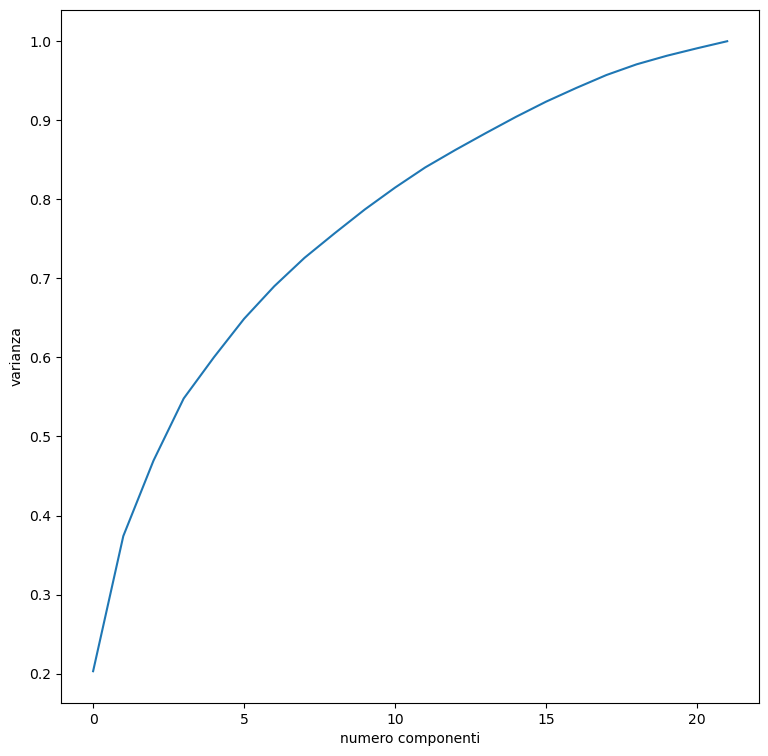

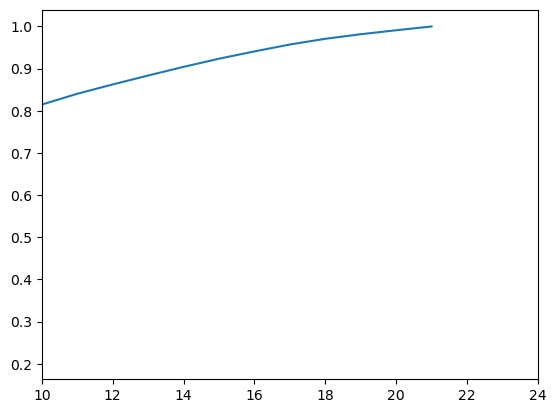

In [133]:
grafico_varianza_pca(dataset_google_reviews)

In [134]:
## se vogliamo applicare riduzione della dimensionalità con PCA per preservare il 90 pecento della varianza, utilizziamo un  numero di componenti pari a 15 togliendone 8

In [135]:
def applica_pca(df, num_components):
    pca15 = PCA(n_components=num_components)
    dataset_google_reviews_copy_reduct = pd.DataFrame(pca15.fit_transform(df))
    dataset_google_reviews_copy_reduct.index = 'User ' + (dataset_google_reviews_copy_reduct.index + 1).astype(str)
    dataset_google_reviews_copy_reduct.columns = 'Autoval ' + (dataset_google_reviews_copy_reduct.columns + 1).astype(str)
    return dataset_google_reviews_copy_reduct

In [136]:
#dataset_google_reviews = applica_pca(dataset_google_reviews, 15)

In [137]:
## Proviamo a trovare dei cluster, troviamo innanzitutto il numero di cluster ottimali mediante il metodo elbow

In [138]:
def elbow_method(dataframe2, lim):
    inertia = []
    K = range(lim[0],lim[1])
    for k in K:
        kmeanModel = KMeans(n_clusters=k, n_init=10).fit(dataframe2)
        inertia.append(kmeanModel.inertia_)

    plt.figure(figsize=(7,7))
    plt.plot(K, inertia, 'bx-')
    plt.xticks(K)
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    


In [139]:
def trova_eps(df,num_vicini):
    neighbors = NearestNeighbors(n_neighbors=num_vicini, metric = 'cosine')
    neighbors_fit = neighbors.fit(df)
    distances, indices = neighbors_fit.kneighbors(df)

    #plt.figure(figsize = (14, 14))
    #figure = plt.figure(figsize = (18, 18))

    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,18))

    #axx = plt.subplot()
    #axx.set_xlim([5440, 5500])
    distances = np.sort(distances, axis=0)
    distances_slice = distances[:,1]
    ax1.plot(distances_slice)


    ax2.set_xlim([5000, 5970])
    ax2.plot(distances_slice)
    
    #print(distances)
    #print(distances_slice.shape)
    #print(distances_slice)

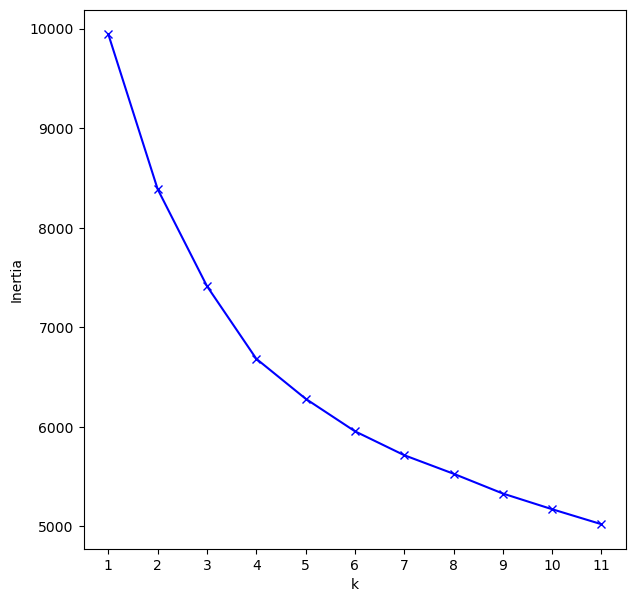

In [140]:
elbow_method(dataset_google_reviews, (1,12))

In [141]:
#elbow_method(dataset_google_reviews_copy_reduct, (4,10))

In [142]:
# il numero di cluster ottimale sembra essere 4 o 5, scegliamo 4 cluster

In [428]:
def clustering_kmeans(df_original,df,n_clusters,titolo=''):
    
    df_original_copy = df_original.copy()
    
    pca3 = PCA(n_components=3)
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++')
    label_clustering = kmeans.fit_predict(df)
    
    print('SH SCORE: {}'.format(silhouette_score(df, kmeans.labels_)))
    print('CHS SCORE: {}'.format(calinski_harabasz_score(df, kmeans.labels_)))
    print('DBI SCORE: {}'.format(davies_bouldin_score(df, kmeans.labels_)))
    
    df_original_copy["Cluster"] = label_clustering
    df_original_copy["Cluster_label"] = 'Cluster ' + (df_original_copy["Cluster"]).astype(str)
    PCs_3d = pd.DataFrame(pca3.fit_transform(df_original_copy.drop(["Cluster" , "Cluster_label"], axis=1))) 
    colonne=[]
    
    for i in range(3):
        colonne.append("PC{}_3d".format(i+1))
        
    PCs_3d.columns = colonne
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    df_original_copy = pd.concat([df_original_copy,PCs_3d], axis=1, join='inner')

    #Plot
    
    colors = ['#DF2020', '#81DF20', '#4dabe6', '#FF66FF', '#804000', '#b3b300', '#669999']
    df_original_copy['c'] = df_original_copy['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 
                                                       5:colors[5], 6:colors[6]})
    
    # trovo cluster center in 3D
    kmeans.fit(PCs_3d)
    centers = kmeans.cluster_centers_
    fig1 = plt.figure(figsize = (18, 18))
    ax = fig1.add_subplot(111, projection = '3d')
    ax.scatter3D(df_original_copy["PC1_3d"], 
                    df_original_copy["PC2_3d"], 
                    df_original_copy["PC3_3d"],
                    alpha=0.5,
                    s=30,
                    c=df_original_copy['c'])

    ax.scatter(xs=centers[:,0], ys=centers[:,1], zs=centers[:, 2], color='black',s=400)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(titolo,y=1.05, fontsize=20);    
    fig = px.scatter_3d(df_original_copy, x='PC1_3d', y='PC2_3d', z='PC3_3d',
              color='Cluster_label')
    fig.add_trace(go.Scatter3d(x=centers[:,0], y=centers[:,1], z=centers[:,2],  text="Centroide", mode='markers', marker=dict(size=15, color='black')))
    fig.show()
    
    
    

In [429]:
def clustering_bisectingkmeans(df_original,df,n_clusters,titolo=''):
    
    df_original_copy = df_original.copy()
    
    pca3 = PCA(n_components=3)
    kmeans = BisectingKMeans(n_clusters=n_clusters, n_init=10, init='k-means++')
    label_clustering = kmeans.fit_predict(df)
    
    print('SH SCORE: {}'.format(silhouette_score(df, kmeans.labels_)))
    print('CHS SCORE: {}'.format(calinski_harabasz_score(df, kmeans.labels_)))
    print('DBI SCORE: {}'.format(davies_bouldin_score(df, kmeans.labels_)))
    
    df_original_copy["Cluster"] = label_clustering
    df_original_copy["Cluster_label"] = 'Cluster ' + (df_original_copy["Cluster"]).astype(str)
    PCs_3d = pd.DataFrame(pca3.fit_transform(df_original_copy.drop(["Cluster" , "Cluster_label"], axis=1))) 
    colonne=[]
    
    for i in range(3):
        colonne.append("PC{}_3d".format(i+1))
        
    PCs_3d.columns = colonne
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    df_original_copy = pd.concat([df_original_copy,PCs_3d], axis=1, join='inner')

    #Plot
    
    colors = ['#DF2020', '#81DF20', '#4dabe6', '#FF66FF', '#804000', '#b3b300', '#669999']
    df_original_copy['c'] = df_original_copy['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 
                                                       5:colors[5], 6:colors[6]})
    
    # trovo cluster center in 3D
    kmeans.fit(PCs_3d)
    centers = kmeans.cluster_centers_
    fig1 = plt.figure(figsize = (18, 18))
    ax = fig1.add_subplot(111, projection = '3d')
    ax.scatter3D(df_original_copy["PC1_3d"], 
                    df_original_copy["PC2_3d"], 
                    df_original_copy["PC3_3d"],
                    alpha=0.5,
                    s=30,
                    c=df_original_copy['c'])

    ax.scatter(xs=centers[:,0], ys=centers[:,1], zs=centers[:, 2], color='black',s=400)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(titolo,y=1.05, fontsize=20);    
    fig = px.scatter_3d(df_original_copy, x='PC1_3d', y='PC2_3d', z='PC3_3d',
              color='Cluster_label')
    fig.add_trace(go.Scatter3d(x=centers[:,0], y=centers[:,1], z=centers[:,2],  text="Centroide", mode='markers', marker=dict(size=15, color='black')))
    fig.show()
    


In [430]:
def clustering_agglomerativo(df_original, df,n_clusters,link='complete',titolo=''):

    df_original_copy = df_original.copy()
    
    pca3 = PCA(n_components=3)
    
    ag = AgglomerativeClustering(n_clusters=n_clusters, metric ='cosine', linkage=link)
    labels_ac = ag.fit_predict(df)
    print('SH SCORE: {}'.format(silhouette_score(df, labels_ac)))
    print('CHS SCORE: {}'.format(calinski_harabasz_score(df, labels_ac)))
    print('DBI SCORE: {}'.format(davies_bouldin_score(df, labels_ac)))

    df_original_copy["Cluster"] = labels_ac
    df_original_copy["Cluster_label"] = 'Cluster ' + (df_original_copy["Cluster"]).astype(str)
    
    PCs_3d = pd.DataFrame(pca3.fit_transform(df_original_copy.drop(["Cluster", "Cluster_label"], axis=1)))
    
    colonne=[]
    
    for i in range(3):
        colonne.append("PC{}_3d".format(i+1))
        
    
    PCs_3d.columns = colonne
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    df_original_copy = pd.concat([df_original_copy,PCs_3d], axis=1, join='inner')

    #Plot
    
    colors = ['#DF2020', '#81DF20', '#4dabe6', '#FF66FF', '#804000', '#b3b300', '#669999']
    df_original_copy['c'] = df_original_copy['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 
                                                       5:colors[5], 6:colors[6]})

    nc = NearestCentroid()
    nc.fit(PCs_3d, labels_ac)
    centroidi = nc.centroids_
    
    fig1 = plt.figure(figsize = (18, 18))
    
    #if n_components == 3:
       
    ax = fig1.add_subplot(111, projection = '3d')   
    #ax = plt.axes(projection ="3d")
   
    ax.scatter3D(df_original_copy["PC1_3d"], 
                     df_original_copy["PC2_3d"], 
                     df_original_copy["PC3_3d"],
                     alpha=0.5,
                     s=30,
                     c=df_original_copy['c'])
    ax.scatter(xs=centroidi[:,0], ys=centroidi[:,1], zs=centroidi[:, 2], color='black',s=400)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(titolo,y=1.05, fontsize=20);
    
    
    # rifaccio grafico in 2d
    
    #pca2 = PCA(n_components=2)

    
    #pca_2d=pca2.fit_transform(dataset_google_reviews)
    
    #pca2d_clust_labels=ag.fit_predict(pca_2d)
    
    #nc = NearestCentroid()
    #nc.fit(pca_2d, pca2d_clust_labels)
    #centroidi2d = nc.centroids_
    
    #fig2 = plt.figure(figsize = (11, 11))
    
    #plot_2d = fig2.add_subplot(212) 
    
    #plot_2d.scatter(pca_2d[:, 0], pca_2d[:, 1], marker=".", c=pca2d_clust_labels, s=50, cmap='viridis')
    
    #plot_2d.scatter(centroidi2d[:, 0], centroidi2d[:, 1], color='black',s=400);
    
    #coeff = np.transpose(pca2.components_[0:2, :])
    #n = coeff.shape[0]
    #labels = list(df.columns)
    
    #else:
        
        #plt.scatter(dataset_google_reviews_copy["PC1_3d"], dataset_google_reviews_copy["PC2_3d"], marker=".", c=dataset_google_reviews_copy['c'])
        #centers = kmeans.cluster_centers_
        #plt.scatter(centroidi[:, 0], centroidi[:, 1], color='black',s=400);
        
    
    fig = px.scatter_3d(df_original_copy, x='PC1_3d', y='PC2_3d', z='PC3_3d',
              color='Cluster_label')
    
    fig.add_trace(go.Scatter3d(x=centroidi[:,0], y=centroidi[:,1], z=centroidi[:,2],  text="Centroide", mode='markers', marker=dict(size=15, color='black')))
    
    fig.show()
    
    
        

In [431]:
def cluster_dbscan(df_original, df,minimo_esempi,distanza,titolo=''):
    
    df_original_copy = df_original.copy()
    
    pca3 = PCA(n_components=3)
    
    db_labels = DBSCAN(eps=distanza, min_samples=minimo_esempi,metric='cosine').fit_predict(df)
    print('SH SCORE: {}'.format(silhouette_score(df, db_labels)))
    print('CHS SCORE: {}'.format(calinski_harabasz_score(df, db_labels)))
    print('DBI SCORE: {}'.format(davies_bouldin_score(df,db_labels)))

    #print(db_labels)
    
    df_original_copy["Cluster"] = db_labels
    df_original_copy["Cluster_label"] = 'Cluster ' + (df_original_copy["Cluster"]).astype(str)
    
    PCs_3d = pd.DataFrame(pca3.fit_transform(df_original_copy.drop(["Cluster", "Cluster_label"], axis=1)))
    
    nc = NearestCentroid()
    nc.fit(PCs_3d, db_labels)
    centroidi = nc.centroids_
    
    colonne=[]
    
    for i in range(3):
        colonne.append("PC{}_3d".format(i+1))
    
    PCs_3d.columns = colonne
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    df_original_copy = pd.concat([df_original_copy,PCs_3d], axis=1, join='inner')
    
    #Plot
    fig1 = plt.figure(figsize = (18, 18))

    #if n_components == 3:
        
    ax = fig1.add_subplot(111, projection = '3d')    
    #ax = plt.axes(projection ="3d")
    
    ax.scatter3D(df_original_copy["PC1_3d"], 
                     df_original_copy["PC2_3d"], 
                     df_original_copy["PC3_3d"],
                     s=30,
                     c=db_labels)
    
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(titolo,y=1.05, fontsize=20);

    # rifaccio grafico in 2d
    
    #pca2 = PCA(n_components=2)

    
    #pca_2d=pca2.fit_transform(dataset_google_reviews)
    
    #pca2d_clust_labels=DBSCAN(eps=distanza, min_samples=minimo_esempi,metric='cosine').fit_predict(pca_2d)
    
    
    #fig2 = plt.figure(figsize = (11, 11))
    
    #plot_2d = fig2.add_subplot(212) 
    
    #plot_2d.scatter(pca_2d[:, 0], pca_2d[:, 1], c=pca2d_clust_labels, s=50, cmap='viridis')
    
    #plot_2d.scatter(centers2d[:, 0], centers2d[:, 1], color='black',s=400);
    
    #coeff = np.transpose(pca2.components_[0:2, :])
    #n = coeff.shape[0]
    #labels = list(df.columns)
    
    #else:
        
        #plt.scatter(dataset_google_reviews_copy["PC1_3d"], dataset_google_reviews_copy["PC2_3d"], marker=".", c=db_labels)
        
    fig = px.scatter_3d(df_original_copy, x='PC1_3d', y='PC2_3d', z='PC3_3d',
              color='Cluster_label')
    
    fig.add_trace(go.Scatter3d(x=centroidi[:,0], y=centroidi[:,1], z=centroidi[:,2],  text="Centroide", mode='markers', marker=dict(size=15, color='black')))
    
    fig.show()
    
    
    
        

In [432]:
def cluster_hdbscan(df_original, df,titolo=''):
    
    df_original_copy = df_original.copy()
    
    pca3 = PCA(n_components=3)
    
    db_labels = HDBSCAN().fit_predict(df)

    #print(db_labels)
    
    df_original_copy["Cluster"] = db_labels
    df_original_copy["Cluster_label"] = 'Cluster ' + (df_original_copy["Cluster"]).astype(str)
    
    PCs_3d = pd.DataFrame(pca3.fit_transform(df_original_copy.drop(["Cluster", "Cluster_label"], axis=1)))
    
    colonne=[]
    
    for i in range(3):
        colonne.append("PC{}_3d".format(i+1))
    
    PCs_3d.columns = colonne
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    df_original_copy = pd.concat([df_original_copy,PCs_3d], axis=1, join='inner')
    
    #Plot
    fig1 = plt.figure(figsize = (18, 18))

    #if n_components == 3:
        
    ax = fig1.add_subplot(111, projection = '3d')
    ax.scatter3D(df_original_copy["PC1_3d"], 
                     df_original_copy["PC2_3d"], 
                     df_original_copy["PC3_3d"],
                     s=30,
                     c=db_labels)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(titolo,y=1.05, fontsize=20);
    
    #else:
        
        #plt.scatter(dataset_google_reviews_copy["PC1_3d"], dataset_google_reviews_copy["PC2_3d"], marker=".", c=db_labels)
        
    # rifaccio grafico in 2d
    
    #pca2 = PCA(n_components=2)

    
    #pca_2d=pca2.fit_transform(df)
    
    #pca2d_clust_labels=HDBSCAN().fit_predict(pca_2d)
    
    #centers2d = kmeans.cluster_centers_
    
    #fig2 = plt.figure(figsize = (11, 11))
    
    #plot_2d = fig2.add_subplot(212) 
    
    #plot_2d.scatter(pca_2d[:, 0], pca_2d[:, 1], c=pca2d_clust_labels, s=50, cmap='viridis')
    
    #plot_2d.scatter(centers2d[:, 0], centers2d[:, 1], color='black',s=400);
    
    fig = px.scatter_3d(df_original_copy, x='PC1_3d', y='PC2_3d', z='PC3_3d',
              color='Cluster_label')
    
    #fig.add_trace(go.Scatter3d(x=centroidi[:,0], y=centroidi[:,1], z=centroidi[:,2],  text="Centroide", mode='markers', marker=dict(size=15, color='black')))
    
    fig.show()

In [433]:
def clustering_affinity(df_original, df,titolo=''):
    
    df_original_copy = df_original.copy()
    
    cosine_sim_matrix = cosine_similarity(df)
    
    pca3 = PCA(n_components=3)
    
    spect = AffinityPropagation(affinity='precomputed', copy=False)
    
    label_clustering = spect.fit_predict(cosine_sim_matrix)
    
    #print(label_clustering)
    #print(label_clustering.shape)
    #nc2 = NearestCentroid()
    #nc2.fit(dataset_google_reviews_copy, label_clustering)
    #centroidi2 = nc2.centroids_

    df_original_copy["Cluster"] = label_clustering
    df_original_copy["Cluster_label"] = 'Cluster ' + (df_original_copy["Cluster"]).astype(str)
    
    PCs_3d = pd.DataFrame(pca3.fit_transform(df_original_copy.drop(["Cluster", "Cluster_label"], axis=1)))
    
    #print(centers)
    
    colonne=[]
    
    for i in range(3):
        colonne.append("PC{}_3d".format(i+1))
        
    
    PCs_3d.columns = colonne
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    df_original_copy = pd.concat([df_original_copy,PCs_3d], axis=1, join='inner')

    #Plot
    
    colors = ['#DF2020', '#81DF20', '#4dabe6', '#FF66FF', '#804000', '#b3b300', '#669999']
    df_original_copy['c'] = df_original_copy['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 
                                                       5:colors[5], 6:colors[6]})
    
    nc = NearestCentroid()
    nc.fit(PCs_3d, label_clustering)
    centroidi = nc.centroids_
    
    # trovo cluster center in 3D
    
    #kmeans.fit(PCs_3d)
    
    #centers = kmeans.cluster_centers_
    
    #print(centers)
    
    #print(dataset_google_reviews_copy['c'])

    fig1 = plt.figure(figsize = (18, 18))
    
    #if n_components == 3:
        
    ax = fig1.add_subplot(111, projection = '3d') 
    #ax = plt.axes(projection ="3d")
    ax.scatter3D(df_original_copy["PC1_3d"], 
                     df_original_copy["PC2_3d"], 
                     df_original_copy["PC3_3d"],
                     alpha=0.5,
                     s=30,
                     c=df_original_copy['c'])
        #print(centers.shape)
        #ax.scatter(xs=centers[:, 0], ys=centers[:, 1], zs=centers[:, 2], c='red', s=500);
    ax.scatter(xs=centroidi[:,0], ys=centroidi[:,1], zs=centroidi[:, 2], color='black',s=400)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(titolo,y=1.05, fontsize=20);
        #ax.savefig('Clustering Result.png')  
    
    #else:
        
        #plt.scatter(dataset_google_reviews_copy["PC1_3d"], dataset_google_reviews_copy["PC2_3d"], marker=".", c=dataset_google_reviews_copy['c'])
        #plt.scatter(centers[:, 0], centers[:, 1], color='black',s=400);
        
    
    # rifaccio grafico in 2d
    
    #pca2 = PCA(n_components=2)
    
    #pca_2d=pca2.fit_transform(df)
    
    #cosine_sim_matrix_2d = cosine_similarity(pca_2d)
    
    #pca2d_clust_labels=spect.fit_predict(cosine_sim_matrix_2d)
    
    #nc.fit(pca_2d, pca2d_clust_labels)
    #centers2d = nc.centroids_
    
    #fig2 = plt.figure(figsize = (11, 11))
    
    #plot_2d = fig2.add_subplot(212) 
    
    #plot_2d.scatter(pca_2d[:, 0], pca_2d[:, 1], marker=".", c=pca2d_clust_labels, s=50, cmap='viridis')
    
    #plot_2d.scatter(centers2d[:, 0], centers2d[:, 1], color='black',s=400);
    
    #coeff = np.transpose(pca2.components_[0:2, :])
    #n = coeff.shape[0]
    #labels = list(df.columns)
   
    #for i in range(n):
        #plot_2d.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        #plot_2d.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
        
    
        
    
    #trace1 = ax.scatter3D(dataset_google_reviews_copy["PC1_3d"], 
                          #dataset_google_reviews_copy["PC2_3d"], 
                          #dataset_google_reviews_copy["PC3_3d"], c=label_clustering)

    #trace2 = ax.scatter3D(cluster1["PC1_3d"], cluster1["PC2_3d"], cluster1["PC3_3d"], c='blue')

    #trace3 = ax.scatter3D(cluster2["PC1_3d"], cluster2["PC2_3d"], cluster2["PC3_3d"], c='red')

    #trace4 = ax.scatter3D(cluster3["PC1_3d"], cluster3["PC2_3d"], cluster3["PC3_3d"], c='yellow')

    #trace5 = ax.scatter3D(cluster4["PC1_3d"], cluster4["PC2_3d"], cluster4["PC3_3d"], c='green')

    #trace6 = ax.scatter3D(cluster5["PC1_3d"], cluster5["PC2_3d"], cluster5["PC3_3d"], c='violet')
    
    fig = px.scatter_3d(df_original_copy, x='PC1_3d', y='PC2_3d', z='PC3_3d',
              color='Cluster_label')
    
    fig.add_trace(go.Scatter3d(x=centroidi[:,0], y=centroidi[:,1], z=centroidi[:,2],  text="Centroide", mode='markers', marker=dict(size=15, color='black')))
    
    fig.show()

In [434]:
def cluster_optics(df_original, df,titolo='', max_eps=0.24, min_samples=44):
    
    df_original_copy = df_original.copy()
    
    pca3 = PCA(n_components=3)
    
    clust = OPTICS(min_samples=min_samples, max_eps=max_eps, metric='cosine')
    
    db_labels = clust.fit_predict(df)

    #print(db_labels)
    
    df_original_copy["Cluster"] = db_labels
    df_original_copy["Cluster_label"] = 'Cluster ' + (df_original_copy["Cluster"]).astype(str)
    
    PCs_3d = pd.DataFrame(pca3.fit_transform(df_original_copy.drop(["Cluster", "Cluster_label"], axis=1)))
    
    colonne=[]
    
    for i in range(3):
        colonne.append("PC{}_3d".format(i+1))
    
    PCs_3d.columns = colonne
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    df_original_copy = pd.concat([df_original_copy,PCs_3d], axis=1, join='inner')
    
    #Plot
    fig1 = plt.figure(figsize = (18, 18))

    #if n_components == 3:
        
    ax = fig1.add_subplot(111, projection = '3d')  
    ax.scatter3D(df_original_copy["PC1_3d"], 
                     df_original_copy["PC2_3d"], 
                     df_original_copy["PC3_3d"],
                     s=30,
                     c=db_labels)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(titolo,y=1.05, fontsize=20);
    
    #else:
        
        #plt.scatter(dataset_google_reviews_copy["PC1_3d"], dataset_google_reviews_copy["PC2_3d"], marker=".", c=db_labels)
        
    # rifaccio grafico in 2d
    
    #pca2 = PCA(n_components=2)

    
    #pca_2d=pca2.fit_transform(df)
    
    #pca2d_clust_labels=HDBSCAN().fit_predict(pca_2d)
    
    #centers2d = kmeans.cluster_centers_
    
    #fig2 = plt.figure(figsize = (11, 11))
    
    #plot_2d = fig2.add_subplot(212) 
    
    #plot_2d.scatter(pca_2d[:, 0], pca_2d[:, 1], c=pca2d_clust_labels, s=50, cmap='viridis')
    
    #plot_2d.scatter(centers2d[:, 0], centers2d[:, 1], color='black',s=400);
    
    fig = px.scatter_3d(df_original_copy, x='PC1_3d', y='PC2_3d', z='PC3_3d',
              color='Cluster_label')
    
    #fig.add_trace(go.Scatter3d(x=centroidi[:,0], y=centroidi[:,1], z=centroidi[:,2],  text="Centroide", mode='markers', marker=dict(size=15, color='black')))
    
    fig.show()

In [435]:
def clustering_spettrale(df_original_copy, df,n_clusters,precomputed,titolo=''):
    
    df_original_copy = df_original.copy()
    
    pca3 = PCA(n_components=3)
    
    if precomputed == True:
        cosine_sim_matrix = cosine_similarity(df)
        spect = SpectralClustering(n_clusters=n_clusters,affinity='precomputed')
        label_clustering = spect.fit_predict(cosine_sim_matrix)
    else:
        spect = SpectralClustering(n_clusters=n_clusters)
        label_clustering = spect.fit_predict(df)
    
    
    print('SH SCORE: {}'.format(silhouette_score(df, label_clustering)))
    print('CHS SCORE: {}'.format(calinski_harabasz_score(df, label_clustering)))
    print('DBI SCORE: {}'.format(davies_bouldin_score(df, label_clustering)))
    
    #print(label_clustering)
    #print(label_clustering.shape)
    #nc2 = NearestCentroid()
    #nc2.fit(dataset_google_reviews_copy, label_clustering)
    #centroidi2 = nc2.centroids_

    df_original_copy["Cluster"] = label_clustering
    df_original_copy["Cluster_label"] = 'Cluster ' + (df_original_copy["Cluster"]).astype(str)
    
    PCs_3d = pd.DataFrame(pca3.fit_transform(df_original_copy.drop(["Cluster", "Cluster_label"], axis=1)))
    
    #print(centers)
    
    colonne=[]
    
    for i in range(3):
        colonne.append("PC{}_3d".format(i+1))
        
    
    PCs_3d.columns = colonne
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    df_original_copy = pd.concat([df_original_copy,PCs_3d], axis=1, join='inner')

    #Plot
    
    colors = ['#DF2020', '#81DF20', '#4dabe6', '#FF66FF', '#804000', '#b3b300', '#669999']
    df_original_copy['c'] = df_original_copy['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 
                                                       5:colors[5], 6:colors[6]})
    
    nc = NearestCentroid()
    nc.fit(PCs_3d, label_clustering)
    centroidi = nc.centroids_
    
    # trovo cluster center in 3D
    
    #kmeans.fit(PCs_3d)
    
    #centers = kmeans.cluster_centers_
    
    #print(centers)
    
    #print(dataset_google_reviews_copy['c'])

    fig1 = plt.figure(figsize = (18, 18))
    
    #if n_components == 3:
        
    ax = fig1.add_subplot(111, projection = '3d')    
    #ax = plt.axes(projection ="3d")
    ax.scatter3D(df_original_copy["PC1_3d"], 
                     df_original_copy["PC2_3d"], 
                     df_original_copy["PC3_3d"],
                     alpha=0.5,
                     s=30,
                     c=df_original_copy['c'])
        #print(centers.shape)
        #ax.scatter(xs=centers[:, 0], ys=centers[:, 1], zs=centers[:, 2], c='red', s=500);
    ax.scatter(xs=centroidi[:,0], ys=centroidi[:,1], zs=centroidi[:, 2], color='black',s=400)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(titolo,y=1.05, fontsize=20);
        #ax.savefig('Clustering Result.png')  
    
    #else:
        
        #plt.scatter(dataset_google_reviews_copy["PC1_3d"], dataset_google_reviews_copy["PC2_3d"], marker=".", c=dataset_google_reviews_copy['c'])
        #plt.scatter(centers[:, 0], centers[:, 1], color='black',s=400);
        
    
    # rifaccio grafico in 2d
    
    #pca2 = PCA(n_components=2)
    
    #pca_2d=pca2.fit_transform(df)
    
    #cosine_sim_matrix_2d = cosine_similarity(pca_2d)
    
    #pca2d_clust_labels=spect.fit_predict(cosine_sim_matrix_2d)
    
    #nc.fit(pca_2d, pca2d_clust_labels)
    #centers2d = nc.centroids_
    
    #fig2 = plt.figure(figsize = (11, 11))
    
    #plot_2d = fig2.add_subplot(212) 
    
    #plot_2d.scatter(pca_2d[:, 0], pca_2d[:, 1], marker=".", c=pca2d_clust_labels, s=50, cmap='viridis')
    
    #plot_2d.scatter(centers2d[:, 0], centers2d[:, 1], color='black',s=400);
    
    #coeff = np.transpose(pca2.components_[0:2, :])
    #n = coeff.shape[0]
    #labels = list(df.columns)
   
    #for i in range(n):
        #plot_2d.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        #plot_2d.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
        
    
        
    
    #trace1 = ax.scatter3D(dataset_google_reviews_copy["PC1_3d"], 
                          #dataset_google_reviews_copy["PC2_3d"], 
                          #dataset_google_reviews_copy["PC3_3d"], c=label_clustering)

    #trace2 = ax.scatter3D(cluster1["PC1_3d"], cluster1["PC2_3d"], cluster1["PC3_3d"], c='blue')

    #trace3 = ax.scatter3D(cluster2["PC1_3d"], cluster2["PC2_3d"], cluster2["PC3_3d"], c='red')

    #trace4 = ax.scatter3D(cluster3["PC1_3d"], cluster3["PC2_3d"], cluster3["PC3_3d"], c='yellow')

    #trace5 = ax.scatter3D(cluster4["PC1_3d"], cluster4["PC2_3d"], cluster4["PC3_3d"], c='green')

    #trace6 = ax.scatter3D(cluster5["PC1_3d"], cluster5["PC2_3d"], cluster5["PC3_3d"], c='violet')
    
    fig = px.scatter_3d(df_original_copy, x='PC1_3d', y='PC2_3d', z='PC3_3d',
              color='Cluster_label')
    
    fig.add_trace(go.Scatter3d(x=centroidi[:,0], y=centroidi[:,1], z=centroidi[:,2],  text="Centroide", mode='markers', marker=dict(size=15, color='black')))
    
    fig.show()
    
    

In [436]:
#cluster_dbscan(dataset_google_reviews_copy_reduct, 44, 0.0003,titolo='A')
#clustering_kmeans(dataset_google_reviews_copy_reduct,4,titolo='a')
#cluster_hdbscan(dataset_google_reviews_copy_reduct,titolo='')
#clustering_spettrale(df,n_clusters,titolo='')

## Sistema di raccomandazione

#### Visualizzazione dati

In [152]:
def trovaSimili(k,model):
    return model.kneighbors([k])

In [153]:
def trovaCategorieSimili(u,model,data):
    
    data = data.T     
    _, indici_simili = trovaSimili(data.loc[u],model)
    indici_simili = indici_simili[0,1:]
    return list(map(lambda x: data.iloc[[x]].index[0],indici_simili.flatten().tolist()))

In [154]:
def trovaSimiliA(u,model,data, type='item'):
    
    if type=='item':
        data = data.T
        
    dist, indici_simili = trovaSimili(data.loc[u],model)
    dist, indici_simili = dist[0, 1:], indici_simili[0,1:]
    
    return dist, indici_simili

In [155]:
def get_rating_medio_user(u):
    
    aux = list(dataset_google_reviews.loc[u])
    res = sum(1 for x in aux if x != 0)
    rating_medio_user = (np.sum(dataset_google_reviews.loc[u]))/res
    
    return rating_medio_user;

In [156]:
def get_rating_medio_user_by_index(data, indice_u):
    
    #print('calcolo rating medio user{}'.format(indice_u))
    
    aux = list(data.iloc[indice_u])
    
    #print('aux: {}'.format(aux))
    
    res = sum(1 for x in aux if x != 0)
    
    #print('res: {}'.format(res))
    
    somma = sum(data.iloc[indice_u])
    
    #print('somma: {}'.format(somma))
    
    rating_medio_user = sum(data.iloc[indice_u])/res
    
    return rating_medio_user;

In [157]:
def predici_categorie_novote_user_no_rec_ub(data,distances,indices,nn, index_user):
    
    #print('processamento user {}'.format(index_user))
    data_copy = data.copy()
    
    sim_us = indices[index_user].tolist()
    us_distances = distances[index_user].tolist()
                
    if index_user in sim_us:
        
        id_us = sim_us.index(index_user)
        sim_us.remove(index_user)
        us_distances.pop(id_us)
                
    user_similarity = [1-x for x in us_distances]
    
    user_similarity_copy = user_similarity.copy()
    
    #print(sim_us)
    #print(us_distances)
       
    rating_medio_user = get_rating_medio_user_by_index(data_copy, index_user)
    
    #print('indici simili: {}'.format(sim_us))
    
    #print('distanze indici simili: {}'.format(user_similarity))

    
    #print('rating medio user{0} pari a {1}'.format(index_user, rating_medio_user))
        
    for n,cat in enumerate(data_copy.columns.tolist()):
        
        
        if data_copy.iloc[index_user,n] == 0:
            
            #print((1/np.sum(user_similarity_copy)))
            
            numeratore = 0
            
            for k in range(0, len(user_similarity)):
                
                #elimino utente se non ha votato nulla
                
                if any(data_copy.iloc[sim_us[k]]) != 0:
                    
                    num_item_co_rated = 0
                    
                    for z,j in enumerate(data_copy.columns.tolist()):
                        
                        #item co rated
                        if data_copy.iloc[index_user,z] != 0 and data_copy.iloc[sim_us[k],z] != 0:
                            
                        
                            num_item_co_rated+=1
                            
                    
                    if num_item_co_rated > 0:
                        
                        rating_user_simile = data_copy.iloc[sim_us[k], z]
                        rating_medio_user_simile = get_rating_medio_user_by_index(data_copy, sim_us[k])
                        numeratore = numeratore + (user_similarity[k] * (rating_user_simile - rating_medio_user_simile))
                        
                        
                    else:
                        
                        print('nessun item co rated user {} '.format(k))
                        if len(user_similarity_copy) == (nn-1):
                            #print('1 cancello indice {}'.format(k))
                            user_similarity_copy.pop(k)
                        else:
                            ind_rem = k-(len(user_similarity)-len(user_similarity_copy))
                            #print('2 cancello indice {}'.format(ind_rem))
                            user_similarity_copy.pop(ind_rem)
                        
                    
                    
                
                #print('iterazione indice {}'.format(k))
                
                else:
                    
                    print('nessun item votato user {} '.format(k))
                    #print('lista similarita originale: {}'.format(user_similarity))
                    #print('lista similarita copia: {}'.format(user_similarity_copy))
                    #print('z') 
                    if len(user_similarity_copy) == (nn-1):
                        #print('1 cancello indice {}'.format(k))
                        user_similarity_copy.pop(k)
                    else:
                        ind_rem = k-(len(user_similarity)-len(user_similarity_copy))
                        #print('2 cancello indice {}'.format(ind_rem))
                        user_similarity_copy.pop(ind_rem)
                    
                    
                    
                    
                    
            
            #print('user similarity copy: {}'.format(user_similarity_copy))
            if len(user_similarity_copy) > 0:
                
                if sum(user_similarity_copy) > 0:
                    #print('b')
                    predicted_r = rating_medio_user + (numeratore/(sum(user_similarity_copy)))
                else:
                    #print('c')
                    predicted_r = 0
            else:
                #print('a')
                predicted_r = 0
            
            #print('predicted: {}'.format(predicted_r))
            data.iloc[index_user,n] = predicted_r
    

In [158]:
def predici_categorie_novote_user_no_rec(data,distances,indices,nn,index_user):
    
    #print(index_user)
    
    data_copy = data.copy()
    
    for i,k in list(enumerate(data_copy.T.index)):
               
        if data_copy.T.iloc[i, index_user] == 0:
                
                    sim_cat = indices[i].tolist()
                    cat_distances = distances[i].tolist()
                
                    if i in sim_cat:
                        id_cat = sim_cat.index(i)
                        sim_cat.remove(i)
                        cat_distances.pop(id_cat)
                
                    cat_similarity = [1-x for x in cat_distances]
                    cat_similarity_copy = cat_similarity.copy()
                    nominatore = 0
                    for s in range(0, len(cat_similarity)):
                        
                        #print('iterazione indice {}'.format(s))

                        if data_copy.T.iloc[sim_cat[s], index_user] == 0:
                            
                            
                            #print('indice cat {} uguale a zero'.format(s))
                            
                            #print('cat_similarity_copy prima: {}'.format(cat_similarity_copy))
                            
                            #print('lista similarita originale: {}'.format(cat_similarity))
                            #print('lista similarita copia: {}'.format(cat_similarity_copy))
                            
                            if len(cat_similarity_copy) == (nn-1):
                                
                                #print('1 cancello indice {}'.format(s))

                                #print('a cancello {}'.format(sim_cat[s]))
                                cat_similarity_copy.pop(s)
                            else:
                                #print('b cancello {}'.format(sim_cat[s]))
                                ind_rem = s-(len(cat_similarity)-len(cat_similarity_copy))
                                #print('2 cancello indice {}'.format(ind_rem))
                                cat_similarity_copy.pop(ind_rem)
                            
                            #print('lista similarita copia fine iterazione: {}'.format(cat_similarity_copy))
                            
                            #print('cat_similarity_copy ora: {}'.format(cat_similarity_copy))
                        else:
                            nominatore = nominatore + cat_similarity[s]*data_copy.T.iloc[sim_cat[s],index_user]
                    if len(cat_similarity_copy) > 0:
                        if sum(cat_similarity_copy) > 0:
                            predicted_r = nominatore/sum(cat_similarity_copy)
                        else:
                            predicted_r = 0
                    else:
                        predicted_r = 0
                
                    data.T.iloc[i,index_user] = predicted_r

In [159]:
def predici_categorie_novote_user_rec(data,distances,indices,nn,index_user):
    
    data_copy = data.copy()
    
    #print(index_user)
    
    for i,k in list(enumerate(data_copy.T.index)):
    
                
        if data.T.iloc[i, index_user] == 0:
                
                    sim_cat = indices[i].tolist()
                    cat_distances = distances[i].tolist()
                
                    if i in sim_cat:
                        id_cat = sim_cat.index(i)
                        sim_cat.remove(i)
                        cat_distances.pop(id_cat)
                
                    cat_similarity = [1-x for x in cat_distances]
                    cat_similarity_copy = cat_similarity.copy()
                    nominatore = 0
                    for s in range(0, len(cat_similarity)):
                        #print(sim_cat[s])
                        if data.T.iloc[sim_cat[s], index_user] == 0:
                            if len(cat_similarity_copy) == (nn-1):
                                cat_similarity_copy.pop(s)
                            else:
                                cat_similarity_copy.pop(s-(len(cat_similarity)-len(cat_similarity_copy)))
                        else:
                            nominatore = nominatore + cat_similarity[s]*data.T.iloc[sim_cat[s],index_user]
                    if len(cat_similarity_copy) > 0:
                        if sum(cat_similarity_copy) > 0:
                            predicted_r = nominatore/sum(cat_similarity_copy)
                        else:
                            predicted_r = 0
                    else:
                        predicted_r = 0
                
                
                    data.T.iloc[i,index_user] = predicted_r

In [160]:
def predici_categorie_novote_all_user_no_rec(data, nn):
    dataset_google_reviews_copy_no_rec = data.copy()
    
    #computa matrice di similarita
    model = NearestNeighbors(metric='cosine', algorithm='brute')
    model.fit(dataset_google_reviews_copy_no_rec.T.values)
    distances, indices = model.kneighbors(dataset_google_reviews_copy_no_rec.T.values, n_neighbors=nn)
    
    for i,k in enumerate(dataset_google_reviews_copy_no_rec.index):
        if any(dataset_google_reviews_copy_no_rec.loc[k] == 0):
            predici_categorie_novote_user_no_rec(dataset_google_reviews_copy_no_rec, distances, indices, nn, i)
    
    return dataset_google_reviews_copy_no_rec;

In [350]:
def predici_categorie_novote_all_user_no_rec_surprise(data, metrica='pearson', ub=True, alg='knn'):
    
    df_predict = data.copy()
    dataset_google_reviews_copy_no_rec = transform_into_rating_matrix(data)
    sim_options = {'name': metrica, 'user_based': ub}
    reader = Reader(rating_scale=(0, 1))
    dataset_google_reviews_copy_no_rec_ds = Dataset.load_from_df(dataset_google_reviews_copy_no_rec, reader)
    trainset = dataset_google_reviews_copy_no_rec_ds.build_full_trainset()
    
    if alg == 'knn':
        print('scelto algoritmo knn')
        algo = KNNBasic(sim_options=sim_options)
    elif alg == 'svd':
        print('scelto algoritmo svd')
        algo = SVD()
    elif alg == 'svdpp':
        print('scelto algoritmo svd++')
        algo = SVDpp()
    elif alg == 'coclust':
        print('scelto algoritmo co clustering')
        algo = CoClustering(n_cltr_u=4)
    elif alg == 'baseonly':
        print('scelto algoritmo baseline only')
        algo = BaselineOnly()
    else:
        raise 'algoritmo non contemplato'
        
    algo.fit(trainset)
    
    for row in dataset_google_reviews_copy_no_rec.itertuples(index=False):
        if row[2] == 0:
            

            uid = algo.trainset.to_inner_uid(row[0])
            cid = algo.trainset.to_inner_iid(row[1])
            
            #print('UID ESTERNO: {0}, UID INTERNO: {1}'.format(row[0], uid))
            
            #print('IID ESTERNO: {0}, IID INTERNO: {1}'.format(row[1], cid))
            
            df_predict.iloc[row[0], row[1]] = algo.predict(uid, cid).est
    
    return df_predict;
            
    #algo.test(dataset_google_reviews_copy_no_rec)

In [351]:
def predici_categorie_novote_all_user_rec(data, nn):
    
    dataset_google_reviews_copy_rec = data.copy()
    
    #computa matrice di similarita
    model = NearestNeighbors(metric='cosine', algorithm='brute')
    model.fit(dataset_google_reviews_copy_rec.T.values)
    distances, indices = model.kneighbors(dataset_google_reviews_copy_rec.T.values, n_neighbors=nn)
    
    for i,k in enumerate(dataset_google_reviews_copy_rec.index):
        if any(dataset_google_reviews_copy_rec.loc[k] == 0):
            predici_categorie_novote_user_rec(dataset_google_reviews_copy_rec, distances, indices, nn, i)
    
    return dataset_google_reviews_copy_rec;

In [352]:
def predici_categorie_novote_all_user_no_rec_ub(data, nn):
    dataset_google_reviews_copy_no_rec_ub = data.copy()
    
    #computa matrice di similarita
    model = NearestNeighbors(metric='correlation', algorithm='brute')
    model.fit(dataset_google_reviews_copy_no_rec_ub.values)
    distances, indices = model.kneighbors(dataset_google_reviews_copy_no_rec_ub.values, n_neighbors=nn)
    
    #print(distances)
    
    for i,k in enumerate(dataset_google_reviews_copy_no_rec_ub.index):
        #print(i)
        if any(dataset_google_reviews.loc[k] == 0):
            predici_categorie_novote_user_no_rec_ub(dataset_google_reviews_copy_no_rec_ub, distances, indices, nn, i)
    
    return dataset_google_reviews_copy_no_rec_ub;

In [361]:
dataset_google_reviews_cf=predici_categorie_novote_all_user_no_rec_surprise(dataset_google_reviews)

scelto algoritmo knn
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [362]:
dataset_google_reviews_cf

Category 1  Category 2  Category 3  Category 4  Category 5  \
User                                                                    
User 1       0.162384    0.242402       0.726    0.676259    1.000000   
User 2       0.152941    0.227019       0.726    0.676259    1.000000   
User 3       0.152937    0.226998       0.726    0.671463    1.000000   
User 4       0.162893    0.100000       0.726    0.671463    1.000000   
User 5       0.152937    0.226998       0.726    0.671463    1.000000   
...               ...         ...         ...         ...         ...   
User 5451    0.182000    0.788000       0.796    0.467626    0.422680   
User 5452    0.182000    1.000000       0.800    0.470024    0.425258   
User 5453    0.186000    1.000000       0.804    0.470024    0.427835   
User 5454    0.188000    1.000000       0.806    0.472422    0.427835   
User 5455    0.190000    0.810000       0.810    0.474820    0.430412   

           Category 6  Category 7  Category 8  Category 9  Category 10  ...  \
User                                                                    ...   
User 1       0.465296    1.000000    0.359903    0.358173     0.436754  ...   
User 2       0.465296    1.000000    0.429952    0.358173     0.439141  ...   
User 3       0.465296    1.000000    0.429952    0.358173     0.436754  ...   
User 4       0.465296    1.000000    0.359903    0.358173     0.436754  ...   
User 5       0.465296    1.000000    0.429952    0.358173     0.436754  ...   
...               ...         ...         ...         ...          ...  ...   
User 5451    0.375321    0.340206    0.060386    0.225962     0.059666  ...   
User 5452    0.375321    0.337629    0.055556    0.223558     0.054893  ...   
User 5453    0.375321    0.167526    0.050725    0.221154     0.050119  ...   
User 5454    0.375321    0.162371    0.045894    0.218750     0.045346  ...   
User 5455    0.341902    0.164948    0.041063    0.216346     0.040573  ...   

           Category 14  Category 15  Category 16  Category 17  Category 18  \
User                                                                         
User 1        0.226415        0.348        0.118        0.100     0.012951   
User 2        0.226415        0.348        0.118        0.100     0.010508   
User 3        0.226415        0.348        0.118        0.100     0.010507   
User 4        0.226415        0.348        0.118        0.100     0.012998   
User 5        0.226415        0.348        0.118        0.100     0.010507   
...                ...          ...          ...          ...          ...   
User 5451     0.129717        0.266        0.134        0.132     0.134000   
User 5452     0.125000        1.000        0.132        0.130     0.132000   
User 5453     0.120283        0.178        0.130        0.128     0.130000   
User 5454     0.115566        0.174        0.130        0.126     0.128000   
User 5455     0.110849        1.000        0.128        0.126     0.128000   

           Category 19  Category 20  Category 21  Category 22  Category 23  
User                                                                        
User 1           0.100     0.026948     0.050962     0.084663     0.128831  
User 2           0.100     0.029399     0.051025     0.082007     0.119474  
User 3           0.100     0.029401     0.051023     0.082013     0.119470  
User 4           0.100     0.026991     0.051108     0.084876     0.129246  
User 5           0.100     0.029401     0.051023     0.082013     0.119470  
...                ...          ...          ...          ...          ...  
User 5451        0.318     1.000000     0.208000     1.000000     1.000000  
User 5452        0.138     1.000000     0.210000     1.000000     1.000000  
User 5453        0.318     0.324000     0.212000     1.000000     1.000000  
User 5454        0.148     1.000000     0.214000     1.000000     1.000000  
User 5455        0.150     1.000000     0.216000     1.000000     1.000000  

[5455 rows x 22 

In [363]:
#dataset_voti_predetti_ricorsione=predici_categorie_novote_all_user_rec(dataset_google_reviews, 6)

In [364]:
#applichiamo pca anche ai dataset con le votazioni predette
#dataset_google_reviews_copy_no_rec = applica_pca(dataset_voti_predetti_noricorsione, 15)
#dataset_google_reviews_copy_rec = applica_pca(dataset_google_reviews_copy_rec, 15)

# RISULTATI

In [365]:
#minMaxScaler = MinMaxScaler()
#dataset_google_reviews = pd.DataFrame(minMaxScaler.fit_transform(dataset_google_reviews), columns=dataset_google_reviews.columns, index=dataset_google_reviews.index)
#dataset_voti_predetti_noricorsione = pd.DataFrame(minMaxScaler.fit_transform(dataset_voti_predetti_noricorsione), columns=dataset_google_reviews.columns, index=dataset_google_reviews.index)

In [366]:
#applichiamo pca anche ai dataset con le votazioni predette
#dataset_voti_predetti_cf_original = dataset_voti_predetti_noricorsione.copy()
#dataset_google_reviews_reduct = applica_pca(dataset_google_reviews, 15)
#dataset_google_reviews_cf_reduct = applica_pca(dataset_google_reviews_cf, 15)

In [ ]:
clustering_kmeans(dataset_google_reviews, dataset_google_reviews,4,'Risultati K-Means senza CF')

SH SCORE: 0.16780757823099482
CHS SCORE: 885.8845164086075
DBI SCORE: 1.9072822388953565


In [ ]:
clustering_kmeans(dataset_google_reviews_cf, dataset_google_reviews_cf,4,'Risultati K-Means con CF')
#clustering_kmeans(dataset_google_reviews_copy_no_rec, 'Risultati K-Means con CF senza ricorsione', 5, 3)

In [ ]:
clustering_bisectingkmeans(dataset_google_reviews, dataset_google_reviews,4,'Risultati K-Means divisivo senza CF')

In [ ]:
clustering_bisectingkmeans(dataset_google_reviews_cf, dataset_google_reviews_cf,4,'Risultati K-Means divisivo con CF')

SH SCORE: 0.1147424595060177
CHS SCORE: 453.3948233814543


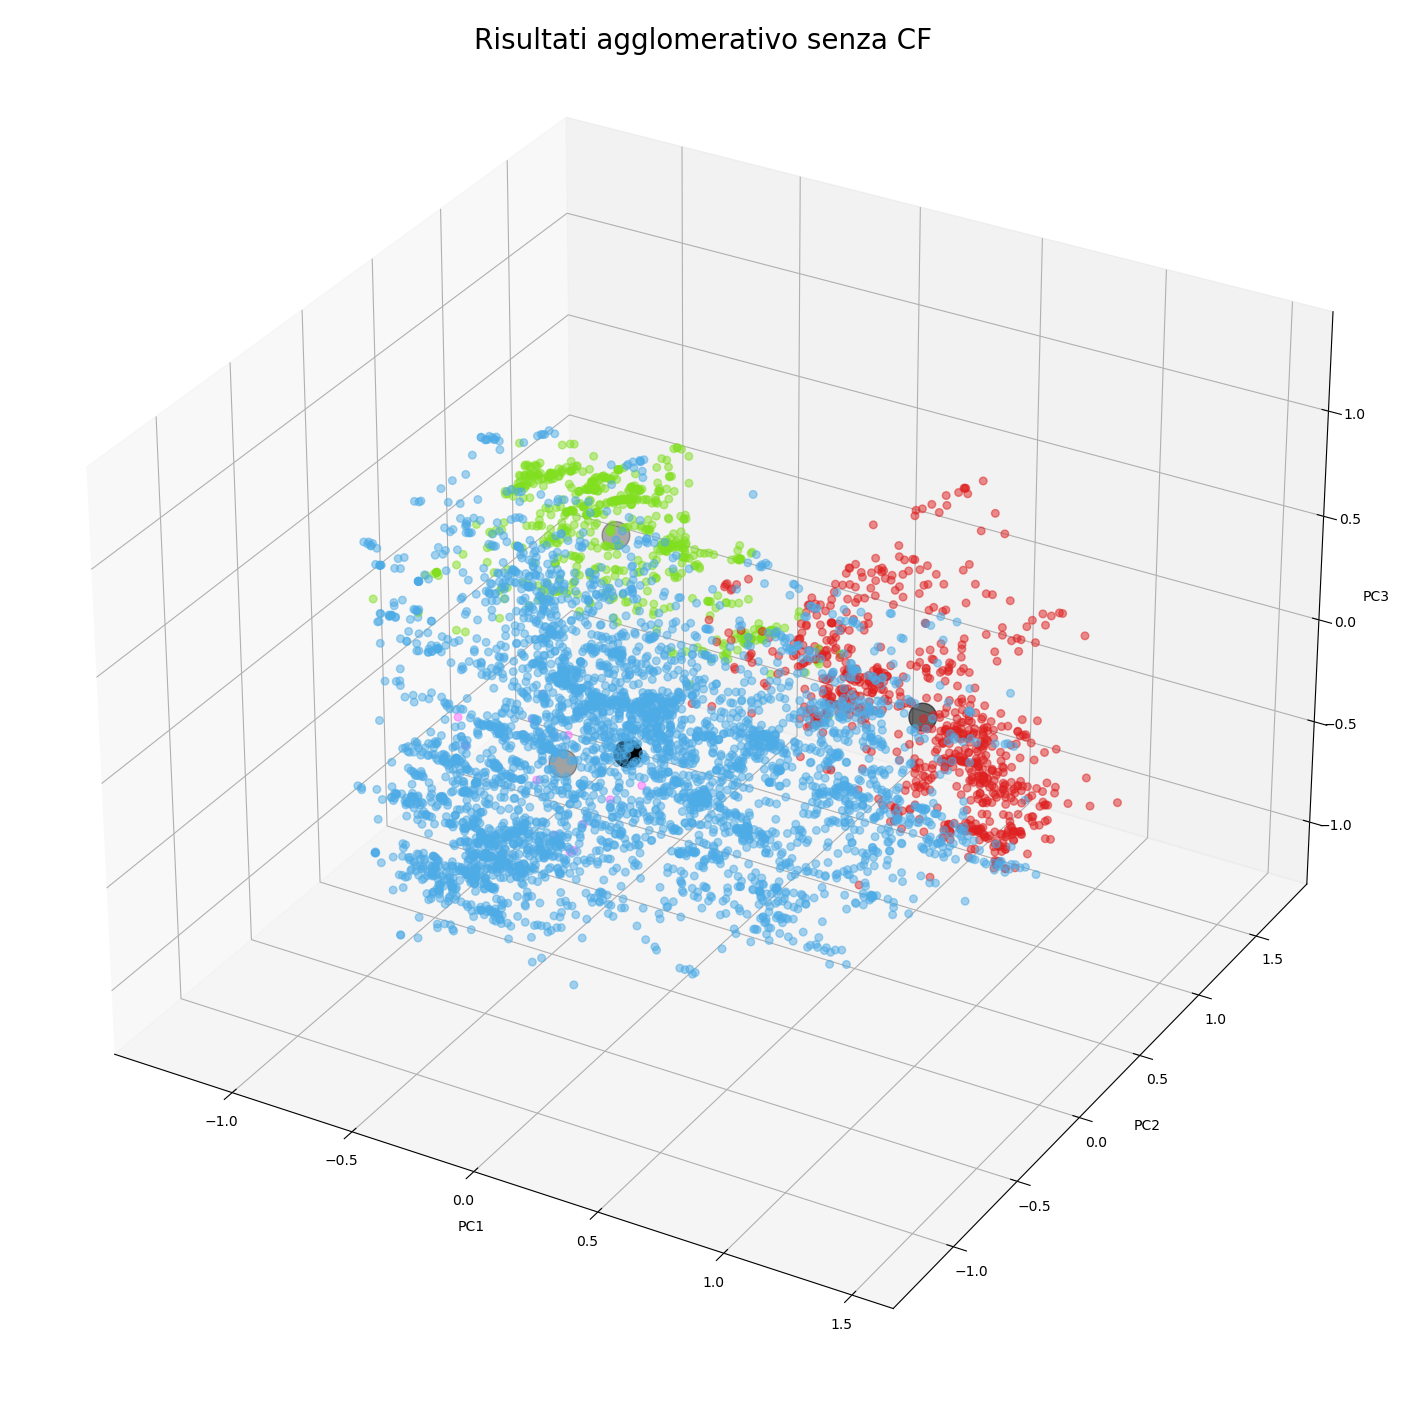

In [415]:
clustering_agglomerativo(dataset_google_reviews, dataset_google_reviews,4,'average','Risultati agglomerativo senza CF')

SILHOUETTE SCORE: 0.10642715835250784


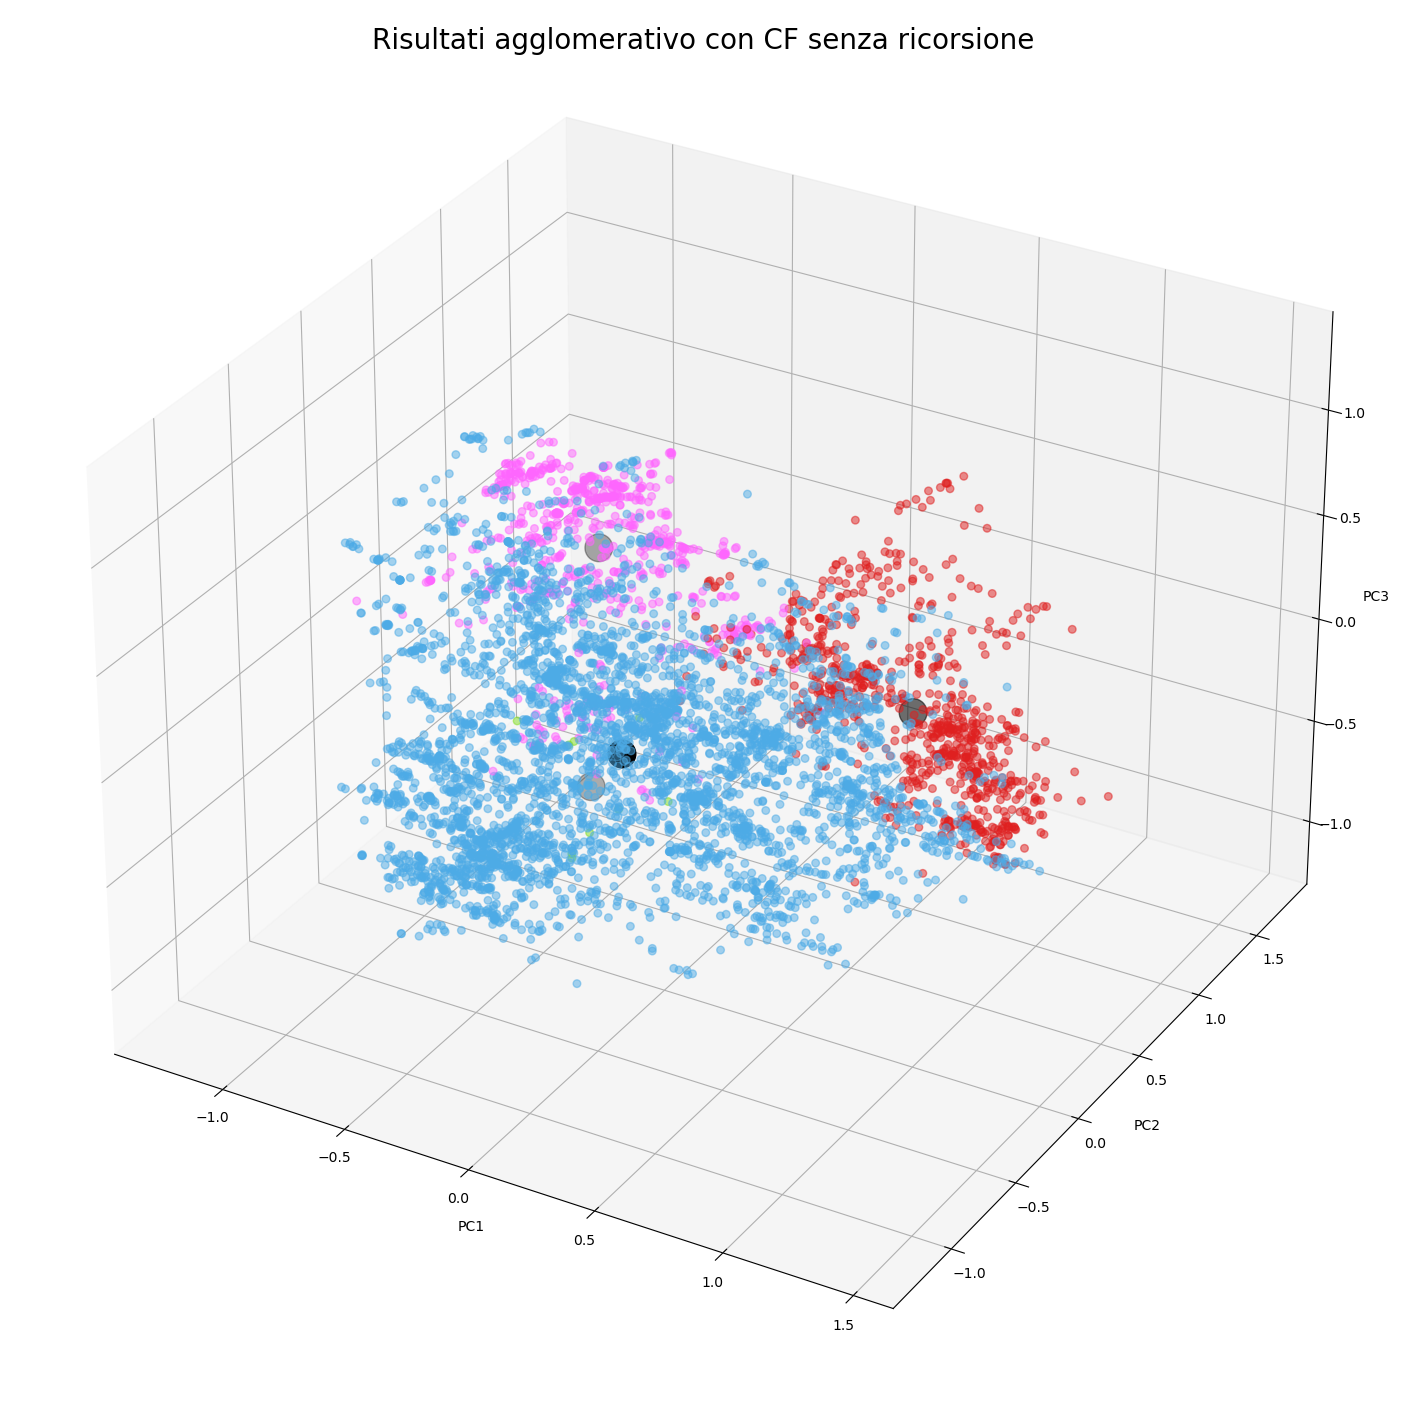

In [177]:
clustering_agglomerativo(dataset_google_reviews_cf, dataset_google_reviews_cf,4,'average','Risultati agglomerativo con CF senza ricorsione')

SILHOUETTE SCORE: 0.1608981846585905


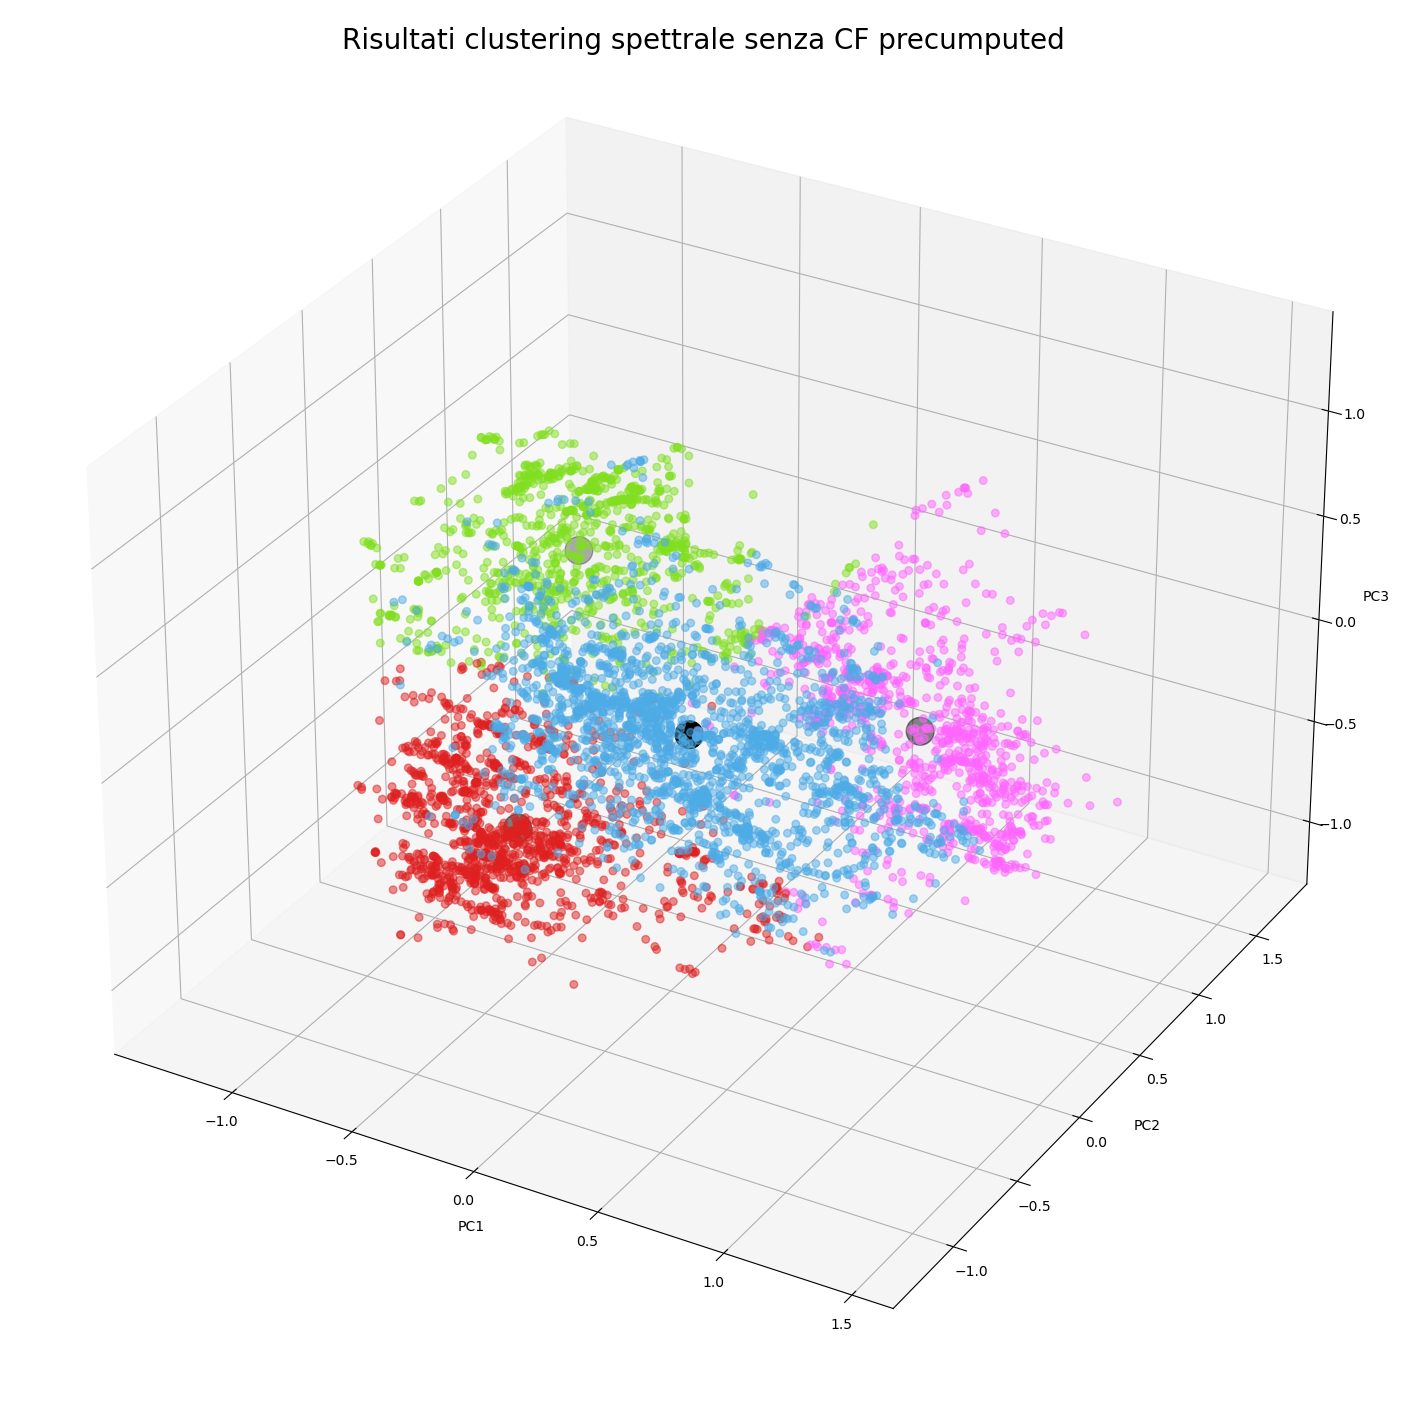

In [371]:
clustering_spettrale(dataset_google_reviews, dataset_google_reviews,4,True,titolo='Risultati clustering spettrale senza CF precumputed')

SILHOUETTE SCORE: 0.16126509683269855


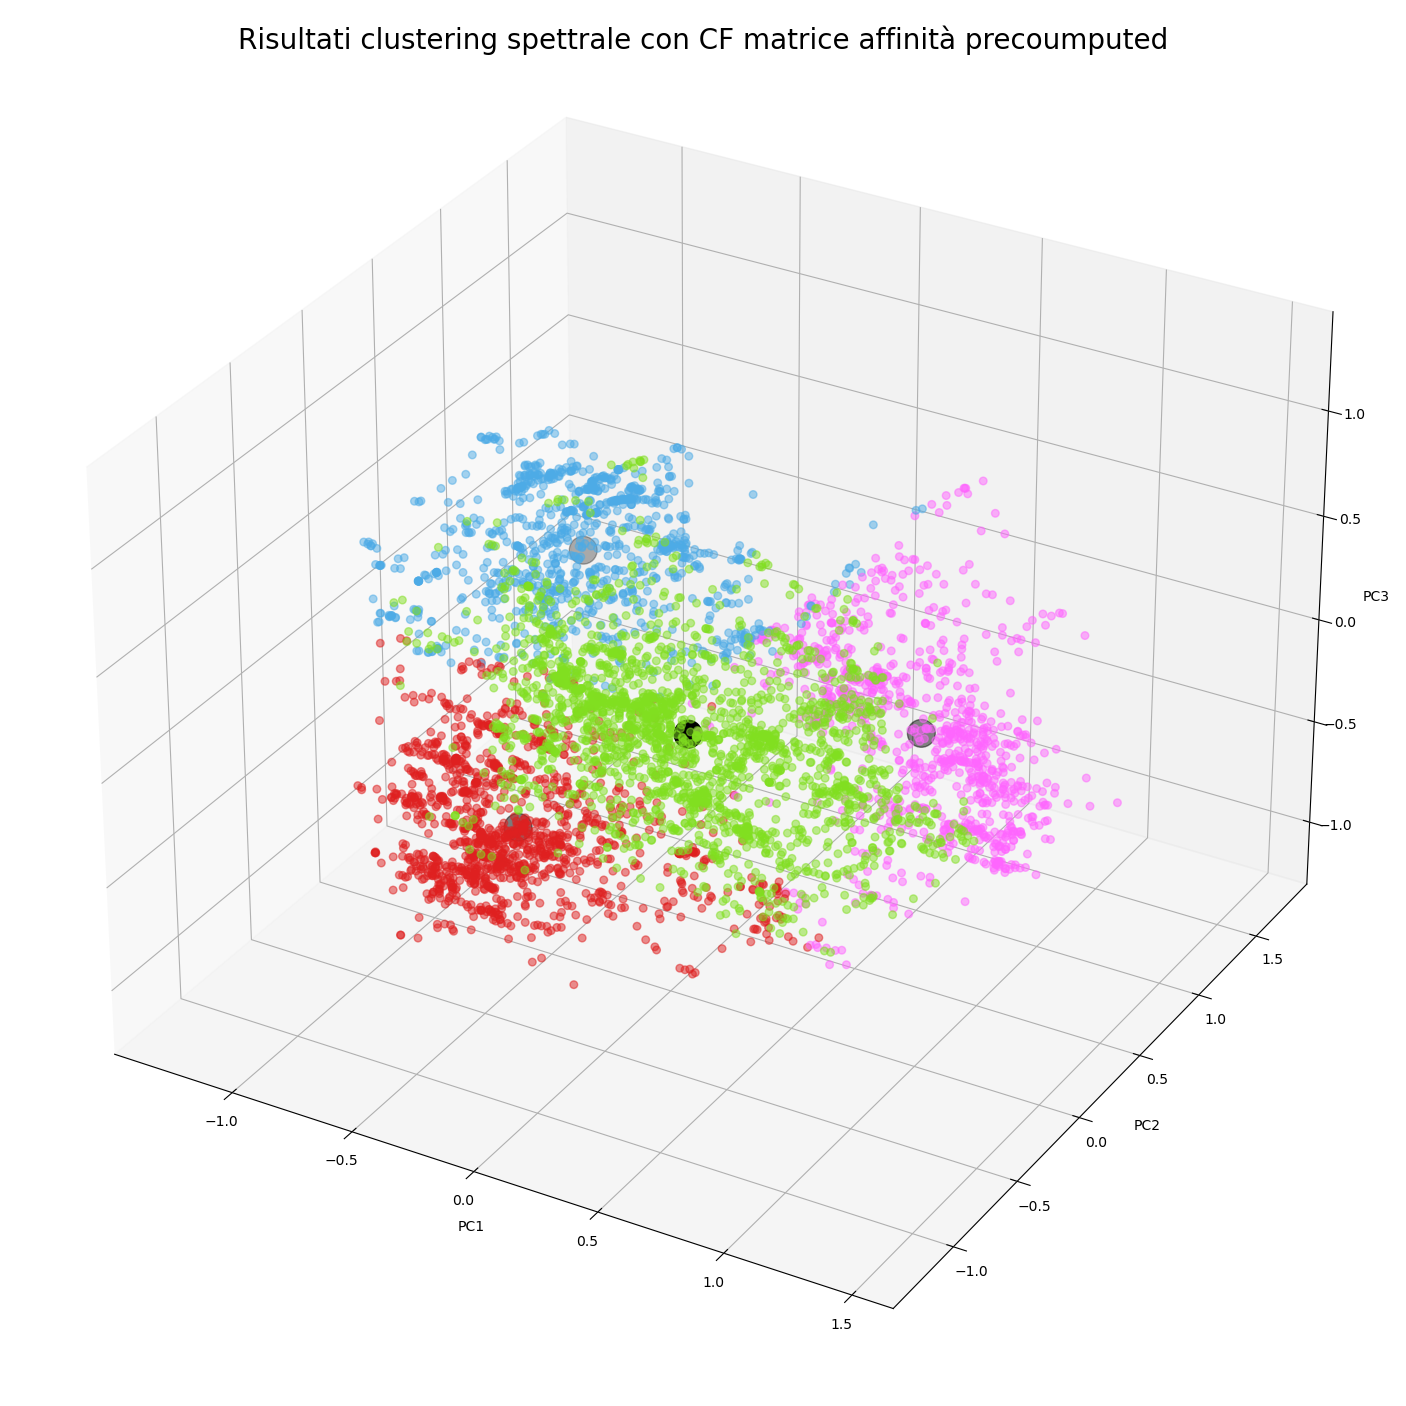

In [372]:
clustering_spettrale(dataset_google_reviews_cf, dataset_google_reviews_cf,4,True,titolo='Risultati clustering spettrale con CF matrice affinità precoumputed')

In [373]:
#clustering_spettrale(dataset_google_reviews, dataset_google_reviews,4,False,titolo='Risultati clustering spettrale con CF con funzioni kernel')

## Clustering basato su densità (DBSCAN - HDBSCAN - OPTICS)

In [241]:
#cluster_hdbscan(dataset_google_reviews_copy_reduct,titolo='HDBSCAN senza CF')

In [242]:
# utilizzando l'euristica min_samples = 2D dove D è il numero di dimensioni, plottiamo per numero vicini = min_samples la distanza di ciascun punto e ordiniamo per distanza
#prendiamo l'elbow della curva che corrisponde a circa 0.17

In [403]:
#trova_eps(dataset_google_reviews, 44)

In [404]:
#cluster_dbscan(dataset_google_reviews, dataset_google_reviews,100,0.07,titolo='DBSCAN senza CF')

In [374]:
#cluster_optics(dataset_google_reviews_copy_reduct,titolo='OPTIC senza CF')
#cluster_optics(dataset_google_reviews, dataset_google_reviews,titolo='OPTIC senza CF', max_eps=0.3, min_samples=44)

In [375]:
#clustering_affinity(dataset_voti_predetti_noricorsione,titolo='')

In [376]:
#clustering_agglomerativo(dataset_google_reviews_copy_rec,6,'average','Risultati agglomerativo con CF senza ricorsione')

In [377]:
#trova_eps(dataset_google_reviews_copy_reduct)

In [378]:
#cluster_hdbscan(dataset_google_reviews_copy_reduct, 44, 0.006,titolo='A')

In [379]:
#dataset_google_reviews_copy_no_rec_pca = pca.fit_transform(dataset_google_reviews_copy_no_rec)
#dataset_google_reviews_copy_rec_pca = pca.fit_transform(dataset_google_reviews_copy_rec)

In [380]:
#label_no_rec = kmeans.fit_predict(dataset_google_reviews_copy_no_rec_pca)

In [381]:
#label_rec = kmeans.fit_predict(dataset_google_reviews_copy_rec_pca)

In [382]:
# clustering senza collaborative filtering

#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_scaled_pca[:, 0], dataset_google_reviews_scaled_pca[:, 1], c=label, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='#c22604', s=200, alpha=1);

In [383]:
# clustering con collaborative filtering senza ricorsione
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_no_rec_pca[:, 0], dataset_google_reviews_copy_no_rec_pca[:, 1], c=label_no_rec, s=50, cmap='viridis')

#centers_no_rec_pca = kmeans.cluster_centers_
#plt.scatter(centers_no_rec_pca[:, 0], centers_no_rec_pca[:, 1], c='#c22604', s=200);

In [384]:
# clustering con collaborative filtering con ricorsione
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_rec_pca[:, 0], dataset_google_reviews_copy_rec_pca[:, 1], c=label_rec, s=50, cmap='viridis')

#centers_rec_pca = kmeans.cluster_centers_
#plt.scatter(centers_rec_pca[:, 0], centers_rec_pca[:, 1], c='#c22604', s=200);

In [385]:
# vediamo che alcuni punti specialmente nella versione ricorsiva vengono assegnati ad altri cluster, proviamo con altre tecniche di clustering 

In [386]:
#ag = AgglomerativeClustering(n_clusters=5)
#labels_ac_no_rec = ag.fit_predict(dataset_google_reviews_copy_no_rec_pca)

In [387]:
#nc = NearestCentroid()
#nc.fit(dataset_google_reviews_copy_no_rec_pca, labels_ac_no_rec)
#centroidi_no_rec_pca = nc.centroids_

In [388]:
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_no_rec_pca[:, 0], dataset_google_reviews_copy_no_rec_pca[:, 1], c=labels_ac_no_rec, s=50, cmap='viridis')
#plt.scatter(centroidi_no_rec_pca[:, 0], centroidi_no_rec_pca[:, 1], c='#c22604', s=200);

In [389]:
# vediamo che minimizzando la somma del quadrato delle distanze per ciascun cluster usando la distanza euclidea, il risultato
# non è buono, escono diversi punti clusterizzati male, utilizziamo quindi come metrica la coseno similarità che è quella usata per il collaborative filtering
# per predirre i rating vuoti


In [390]:
#ag = AgglomerativeClustering(affinity ='cosine', linkage='complete', n_clusters=5)
#labels_ac_no_rec = ag.fit_predict(dataset_google_reviews_copy_no_rec_pca)

In [391]:
#nc.fit(dataset_google_reviews_copy_no_rec_pca, labels_ac_no_rec)
#centroidi_no_rec_pca = nc.centroids_

In [392]:
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_no_rec_pca[:, 0], dataset_google_reviews_copy_no_rec_pca[:, 1], c=labels_ac_no_rec, s=50, cmap='viridis')
#plt.scatter(centroidi_no_rec_pca[:, 0], centroidi_no_rec_pca[:, 1], c='#c22604', s=200);

In [393]:
#proviamo 

In [394]:
#labels_ac_rec = ag.fit_predict(dataset_google_reviews_copy_rec_pca)

In [395]:
#nc.fit(dataset_google_reviews_copy_rec_pca, labels_ac_rec)
#centroidi_rec_pca = nc.centroids_

In [396]:
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_rec_pca[:, 0], dataset_google_reviews_copy_rec_pca[:, 1], c=labels_ac_rec, s=50, cmap='viridis')
#plt.scatter(centroidi_rec_pca[:, 0], centroidi_rec_pca[:, 1], c='#c22604', s=200);

In [397]:
#neighbors = NearestNeighbors(n_neighbors=44, metric = 'cosine')
#neighbors_fit = neighbors.fit(dataset_google_reviews_copy_no_rec_pca)
#distances, indices = neighbors_fit.kneighbors(dataset_google_reviews_copy_no_rec_pca)

In [398]:
#plt.figure(figsize = (14, 14))
#figure = plt.figure(figsize = (18, 18))
#axx = plt.subplot()
#axx.set_xlim([5440, 5500])
#distances = np.sort(distances, axis=0)
#distances_slice = distances[:,1]
#axx.plot(distances_slice)

In [399]:
#plt.figure(figsize = (14, 14))
#figure = plt.figure(figsize = (18, 18))
#axx = plt.subplot()
#axx.set_xlim([5440, 5470])
#distances = np.sort(distances, axis=0)
#distances_slice = distances[:,1]
#axx.plot(distances_slice)

In [400]:
#clust = OPTICS(min_samples=44, metric='cosine', cluster_method='dbscan', max_eps=0.002)

#clust.fit(dataset_google_reviews_copy_no_rec_pca)


# Number of clusters in labels, ignoring noise if present.
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_noise_ = list(labels).count(-1)

In [401]:
#plt.figure(figsize=(10, 7))
#G = gridspec.GridSpec(2, 3)
#ax2 = plt.subplot(G[0, :])

#colors = ["g.", "r.", "b.", "y.", "c."]
#for klass, color in zip(range(0, 5), colors):
    #Xk = dataset_google_reviews_copy_no_rec_pca[clust.labels_ == klass]
    #ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
#ax2.plot(dataset_google_reviews_copy_no_rec_pca[clust.labels_ == -1, 0], dataset_google_reviews_copy_no_rec_pca[clust.labels_ == -1, 1], "k+", alpha=0.1)
#ax2.set_title("OPTICS")

In [402]:
#plt.figure(figsize = (14, 14))
#unique_labels = set(labels)
#core_samples_mask = np.zeros_like(labels, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True

#colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
#for k, col in zip(unique_labels, colors):
    #if k == -1:
        # Black used for noise.
        #col = [0, 0, 0, 1]

    #class_member_mask = labels == k

   # xy = dataset_google_reviews_copy_no_rec_pca[class_member_mask & core_samples_mask]
    #plt.plot(
        #xy[:, 0],
        #xy[:, 1],
        #"o",
        #markerfacecolor=tuple(col),
        #markeredgecolor="k",
        #markersize=14,
    #)

    #xy = dataset_google_reviews_copy_no_rec_pca[class_member_mask & ~core_samples_mask]
    #plt.plot(
        #xy[:, 0],
        #xy[:, 1],
        #"o",
        #markerfacecolor=tuple(col),
        #markeredgecolor="k",
        #markersize=6,
    #)

#plt.title(f"Clusters stimati: {n_clusters_}")
#plt.show()